Para la sección de A* solo es necesario correr las celdas del notebook.

Para la sección del problema de la mochila es necesario modificar la ruta de acceso de la función leer_mochila().

Obs: A veces en colab no corre por completo el problema de la mochila para 10,000 valores. Si se puede correr de manera local es mejor.

# A*

Para implementar este algóritmo describiremos al mapa como una gráfica mediante la matriz de incidencia (variable Mapa en la primera celda) usando un diccionario.

Para la heurística se considera la distancia en línea recta de cada ciudad a Bucharest. (Disponible en la presentación de la clase, y en la variable H).


Aquí se tiene la imagen del mapa como referencia.
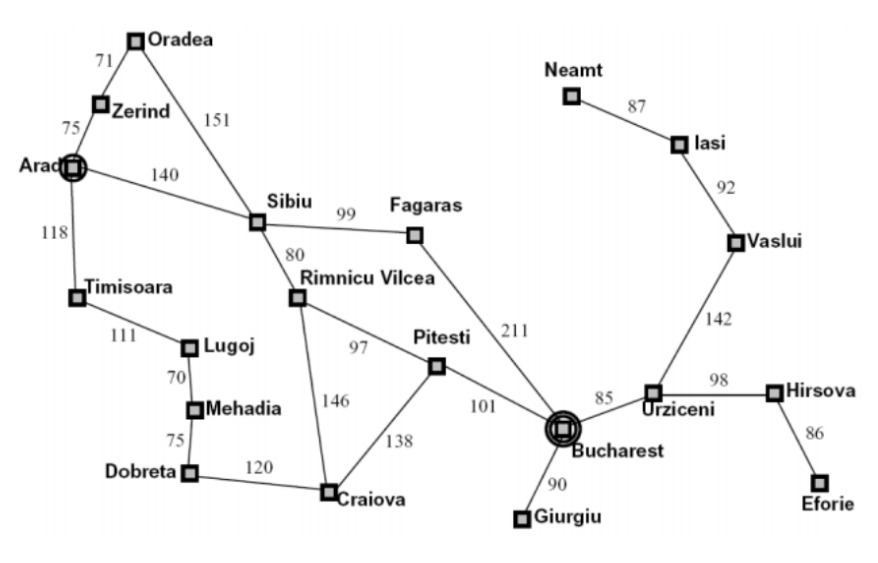

In [ ]:
# Mapa representado mediante la matriz de incidencia.
Mapa = {'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara':118},
     'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
     'Craiova': {'Pitesti': 138, 'Rimmicu Vilces': 146, 'Dobreta': 120},
     'Dobreta': {'Craiova': 120, 'Mehadia':75},
     'Eforie': {'Hirsova': 86},
     'Fagaras': {'Sibiu':99, 'Bucharest':211},
     'Giurgiu': {'Bucharest': 90},
     'Hirsova': {'Eforie':86, 'Urziceni':98},
     'Iasi': {'Neamt':87, 'Vaslui': 92},
     'Lugoj': {'Timisoara':111,'Mehadia':70},
     'Mehadia': {'Lugoj':70, 'Dobreta':75},
     'Neamt': {'Iasi': 87},
     'Oradea': {'Zerind':71,'Sibiu':151},
     'Pitesti': {'Bucharest':101,'Craiova':138,'Rimmicu Vilces':97},
     'Rimmicu Vilces': {'Craiova': 146, 'Pitesti':97, 'Sibiu':80},
     'Sibiu': {'Fagaras': 99, 'Rimmicu Vilces':80, 'Arad':140, 'Oradea': 151},
     'Timisoara': {'Arad':118, 'Lugoj':111},
     'Urziceni': {'Bucharest':85, 'Hirsova':98, 'Vaslui':142},
     'Vaslui': {'Urziceni':142, 'Iasi':92},
     'Zerind': {'Arad':75, 'Oradea':71}
}




# Heurística
# Distancia de cada ciudad a Bucharest
H = {'Arad': 366,
     'Bucharest':0 ,
     'Craiova': 160,
     'Dobreta': 242,
     'Eforie': 161,
     'Fagaras': 178,
     'Giurgiu': 77,
     'Hirsova': 151,
     'Iasi': 226,
     'Lugoj': 244,
     'Mehadia': 241,
     'Neamt': 234,
     'Oradea': 380,
     'Pitesti': 98,
     'Rimmicu Vilces': 193,
     'Sibiu': 253,
     'Timisoara': 329,
     'Urziceni': 80,
     'Vaslui': 199,
     'Zerind': 374
}

In [ ]:
# Previo a los ciclos se inicializan las variables de frontera, costos, y vértices visitados.

# El funcionamiento interno de la implementación tras una iteración del while es reajustar los pesos de cada elemento de la frontera. En particular el peso que cuesta
# el camino hasta ese punto. A partir de eso se reordena la frontera en función del peso más pequeño y se itera otra vez considerando ese peso.

def a_star_search(graph, alfa, beta, h):
    """
    Desarrollo completo de A*

    Input: Una cuarteta compuesta de la gráfica, el nodo inicial (alfa), el nodo objetivo (beta), y la función heurística.
    Output: El camino óptimo entre alfa y beta. (Suponiendo que existe)
    """

    # Inicialización de variables

    # Frontera inicializada solamente con el nodo inicial y el costo 0.
    frontera = [(alfa, 0)]

    # Costo desde alfa al nodo en cuestión
    g_cost = {alfa: 0}

    # Costo estimado. A este valor se le agrega la función ajustada por la heurística.
    f_cost = {alfa: h[alfa]}

    # Diccionario donde se guarda el camino.
    aux = {}

    # Se itera siempre y cuando la frontera no sea vacía.
    while frontera:

        # Ordenación de la frontera en función del costo obtenido a partir de la función de pesos de A*
        frontera.sort(key=lambda x: f_cost[x[0]])
        actual = frontera.pop(0)[0]
        print(f"La frontera es {frontera}")
        print(f"El nodo actual es {actual}")
        print("-------")

        # Revisión de si el nodo actual es la meta. Si sí se "vacía" el diccionario aux para dar el camino final.
        if actual == beta:
            camino = []
            while actual in aux:
                camino.append(actual)
                actual = aux[actual]
            camino.append(alfa)
            return camino
            # Así regresa el camino en orden inverso, pero digo es un tanto lo mismo, se arregla al final de la celda.

        # En caso de que el nodo visitado NO sea la meta se procede con la búsqueda.
        for vecino, costo in graph[actual].items():
            costo_aux = g_cost[actual] + costo
            #print(vecino, costo_aux)

            if vecino not in g_cost or costo_aux < g_cost[vecino]:
                aux[vecino] = actual
                g_cost[vecino] = costo_aux #Costo normal :c
                f_cost[vecino] = costo_aux + h[vecino] #FUNCIÓN DE A*.

                # Revisión para agregar el vecino a la frontera.
                if vecino not in frontera:
                    frontera.append((vecino, f_cost[vecino]))

camino = a_star_search(Mapa, 'Arad', 'Bucharest', H)
camino.reverse()
print("Camino encontrado:", camino)

La frontera es []
El nodo actual es Arad
-------
La frontera es [('Timisoara', 447), ('Zerind', 449)]
El nodo actual es Sibiu
-------
La frontera es [('Fagaras', 417), ('Timisoara', 447), ('Zerind', 449), ('Oradea', 671)]
El nodo actual es Rimmicu Vilces
-------
La frontera es [('Fagaras', 417), ('Timisoara', 447), ('Zerind', 449), ('Craiova', 526), ('Oradea', 671)]
El nodo actual es Pitesti
-------
La frontera es [('Bucharest', 418), ('Timisoara', 447), ('Zerind', 449), ('Craiova', 526), ('Oradea', 671)]
El nodo actual es Fagaras
-------
La frontera es [('Timisoara', 447), ('Zerind', 449), ('Craiova', 526), ('Oradea', 671)]
El nodo actual es Bucharest
-------
Camino encontrado: ['Arad', 'Sibiu', 'Rimmicu Vilces', 'Pitesti', 'Bucharest']


# Problema de la mochila

La idea es aplicar el algoritmo desarollado previamente a una representación gráfica del problema de la mochila. Lo más importante radica en importar los datos y representarlos mediante una gráfica. Si garantizamos que esa representación es adecuada la implementación del algoritmo deberá de regresar una solución adecuada. (No se logró hacer sin el heap) 😞

In [ ]:
# Las primeras dos funciones son para importar los archivos del problema de la mochila.
def linea_procesada(line):
    """
    Separa los documentos en función de las notas de la tarea. El criterio de separación es el espacio.
    Input: Línea del archivo.
    Output: Lista de valores numéricos.

    line = str;
    """
    clean = line.strip('\n').split(' ')
    return [int(i) for i in clean]


def leer_mochila(url):
    """
    Abre y procesa los archivos del problema de la mochila.

    Input: Dirección del archivo. (Este valor se tiene que modificar en caso de una implementación en una compu distinta)
    Output: Tripleta de la cantidad de elementos, capacidad de la mochila, y valores numéricos. (En ese orden)
    """
    valores = []

    with open(url) as archivo:
        lines = archivo.readlines()
        info = linea_procesada(lines.pop(0))
        for line in lines:
            valores.append(linea_procesada(line))

    return info[0], info[1], valores

# Con esta función se plantea representar el problema de la mochila mediante un diccionario tal que se pueda aplicar la implementación previa de A*.
# Se comparan todos los objetos entre ellos y se calcula un "coeficiente" a partir de sumas.
def crear_grafica2(values, num, c):
    """
    Genera la gráfica correspondiente al problema de la mochila.

    Input: La tripleta obtenida por leer_mochila()
    Output: La gráfica sobre la cual se implementará A*.
    """
    graph = {}
    for i in range(num):
        temp = {}
        for j in range(num):
            if j != i:
                val = (values[j][0] + values[i][0])
                peso = values[j][1] + values[i][1]
                h = abs(val - peso)
                temp[str(j)] = h
        graph[str(i)] = temp
    return graph

In [ ]:
def suma_pesos(visitados, values):
    """
    Considera la cantidad de puntos agregados y evita que sobrepasen el límite en cuestión.
    Input: La frontera y los valores considerados.
    Output:
    """
    sum = 0
    for i in visitados:
       sum += values[int(i)][1]
    return sum


#Esta implementación es la que usa Heaps y con la que se obtuvieron los resultados reportados.
#No logré ajustar esta implementación de tal manera que quedara bien sin usar heaps. :c

def crear_grafica(values, num, c):
    graph = {}
    for i in range(num):
        temp = []
        for j in range(num):
            if j != i:
                val = (values[j][0] + values[i][0])     # sumamos el valor
                peso = values[j][1] + values[i][1]      # sumamos los pesos del nuevo objeto
                h = abs(val - peso)
                temp.append((h, str(j)))
        graph[str(i)] = temp
    return graph

def A_estrella_adaptada(graph, alfa, c, values):
    """
    Utiliza A* para reso,ver el problema de la mochila
    """
    visitados = [alfa[1]]
    frontera = [alfa]
    heapq.heapify(frontera)
    while frontera and suma_pesos(visitados, values) <= c:
        current = heapq.heappop(frontera)[1]
        if current not in visitados:
            visitados.append(current)
        for e in graph[current]:
           if e[1] not in visitados:
                heapq.heappush(frontera,e)
    visitados.pop()
    return visitados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
num_19, c_19, values_19 = leer_mochila(r'/content/drive/MyDrive/ks_19_0')
graph_kp_19 = crear_grafica(values_19, num_19, c_19)
objs_19 = A_estrella_adaptada(graph_kp_19, graph_kp_19['0'][0], c_19, values_19)
print('Objetos:', objs_19)
print('(suma obtenida, límite):', (suma_pesos(objs_19[:11], values_19), c_19))

Objetos: ['1', '16', '11', '10', '8', '5', '9', '6', '4', '12', '17']
(suma obtenida, límite): (30860, 31181)


In [ ]:
%%time
num, c, values = leer_mochila(r'/content/drive/MyDrive/ks_10000_0')
graph_kp = crear_grafica(values, num, c)
obj = A_estrella_adaptada(graph_kp, graph_kp['0'][0], c, values)
print('Objetos:', obj)
print('(suma obtenida, límite):', (suma_pesos(obj[:11], values), c))